In [1]:
from torch import nn, flatten, optim
import torch.nn.functional as act
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets, models
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [2]:
data_dir = "../Data/clima"
transform = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),

])
data = datasets.ImageFolder(data_dir, transform)

In [3]:
class_names = data.classes

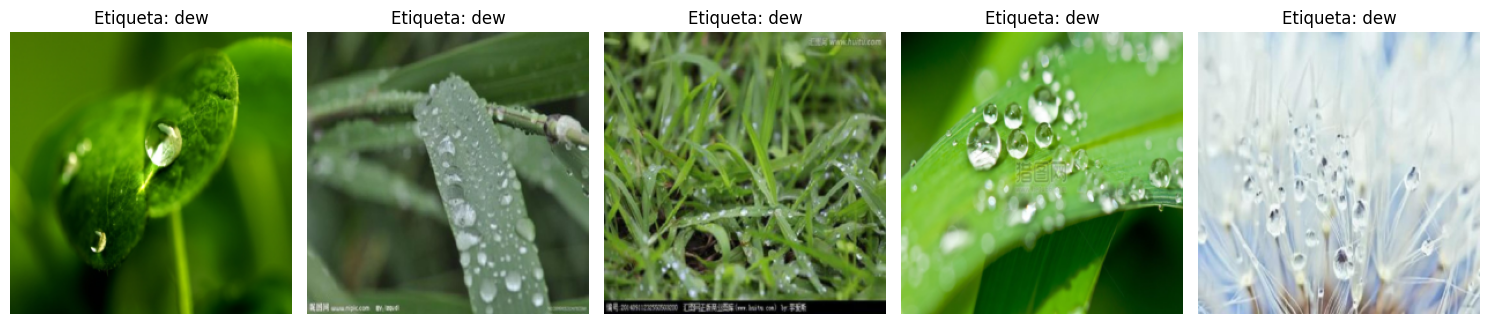

In [4]:

img, etiqueta = data[5]
img = F.to_pil_image(img)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    imagen, etiqueta = data[i]
    imagen = F.to_pil_image(imagen)
    axes[i].imshow(imagen)
    axes[i].set_title(f"Etiqueta: {data.classes[etiqueta]}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

In [5]:
img, l = data[1]
img.shape

torch.Size([3, 244, 244])

In [6]:
DataLoader(data, batch_size=32, shuffle=True)

In [7]:
n = len(data)
train_size = int(n*.7)-1
val_size = int(n*.2)+2
test_size = int(n*.1)

n == train_size + val_size + test_size, train_size, val_size, test_size

(True, 4802, 1374, 686)

In [8]:
train, val, test = random_split(data, [train_size, val_size, test_size])
batch_size = 32
train = DataLoader(train, batch_size, shuffle=True)
val = DataLoader(val, batch_size, shuffle=False)
test = DataLoader(test, batch_size, shuffle=False)

In [9]:
class Clima(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(3, 16, 3)
        self.p1 = nn.MaxPool2d(2)

        self.c2 = nn.Conv2d(16, 32, 3)
        self.c3 = nn.Conv2d(32, 64, 3)

        self.f1 = nn.Linear(64 * 28 * 28, 64)
        self.f2 = nn.Linear(64, 32)
        self.f3 = nn.Linear(32, 11)

        
    def forward(self, x):
        x = self.p1(act.relu(self.c1(x)))
        x = self.p1(act.relu(self.c2(x)))
        x = self.p1(act.relu(self.c3(x)))
        x = flatten(x, 1)
        x = act.relu(self.f1(x))
        x = act.softmax(self.f2(x), dim=1)
        x = self.f3(x)
        return x

In [10]:
model = models.resnet18(pretrained=True)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.7)

c:\Users\vicen\Downloads\Lenguajes\Python\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vicen\Downloads\Lenguajes\Python\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
from tqdm.auto import tqdm

epochs = 20
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    running_loss = 0.0

    for i, data in enumerate(train):
        inputs, labels = data
        inputs, labels = inputs, labels
        
        optimizer.zero_grad()  # Reiniciar gradientes
        outputs = model(inputs)  

        # Calcular la pérdida (CrossEntropyLoss)
        loss = loss_fn(outputs, labels)

        loss.backward()  # Retropropagación
        optimizer.step()  # Actualizar los parámetros

        running_loss += loss.item()
    
    print(f"Loss: {running_loss / len(train):.4f}")

c:\Users\vicen\Downloads\Lenguajes\Python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
------


  5%|▌         | 1/20 [05:12<1:38:54, 312.36s/it]

Loss: 6.8593
Epoch: 1
------


 10%|█         | 2/20 [10:00<1:29:22, 297.93s/it]

Loss: 2.9229
Epoch: 2
------


 15%|█▌        | 3/20 [14:47<1:22:59, 292.92s/it]

Loss: 1.7310
Epoch: 3
------


 20%|██        | 4/20 [19:34<1:17:32, 290.77s/it]

Loss: 1.2871
Epoch: 4
------


 25%|██▌       | 5/20 [24:26<1:12:46, 291.12s/it]

Loss: 1.0394
Epoch: 5
------


 30%|███       | 6/20 [29:26<1:08:40, 294.29s/it]

Loss: 0.9157
Epoch: 6
------


 35%|███▌      | 7/20 [35:08<1:07:06, 309.72s/it]

Loss: 0.7770
Epoch: 7
------


 40%|████      | 8/20 [40:54<1:04:15, 321.28s/it]

Loss: 0.6788
Epoch: 8
------


 45%|████▌     | 9/20 [46:33<59:55, 326.87s/it]  

Loss: 0.6130
Epoch: 9
------


 50%|█████     | 10/20 [51:49<53:54, 323.44s/it]

Loss: 0.5658
Epoch: 10
------


 55%|█████▌    | 11/20 [57:00<47:56, 319.56s/it]

Loss: 0.5111
Epoch: 11
------


 60%|██████    | 12/20 [1:02:09<42:11, 316.42s/it]

Loss: 0.4902
Epoch: 12
------


 65%|██████▌   | 13/20 [1:07:02<36:04, 309.26s/it]

Loss: 0.4293
Epoch: 13
------


 70%|███████   | 14/20 [1:11:31<29:44, 297.38s/it]

Loss: 0.4151
Epoch: 14
------


 75%|███████▌  | 15/20 [1:16:02<24:06, 289.31s/it]

Loss: 0.3854
Epoch: 15
------


 80%|████████  | 16/20 [1:20:31<18:52, 283.11s/it]

Loss: 0.3677
Epoch: 16
------


 85%|████████▌ | 17/20 [1:24:59<13:55, 278.53s/it]

Loss: 0.3505
Epoch: 17
------


 90%|█████████ | 18/20 [1:29:26<09:10, 275.28s/it]

Loss: 0.3412
Epoch: 18
------


 95%|█████████▌| 19/20 [1:33:55<04:33, 273.24s/it]

Loss: 0.3166
Epoch: 19
------


100%|██████████| 20/20 [1:38:23<00:00, 295.19s/it]

Loss: 0.2953


In [12]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

def evaluate_model(model, test_loader, print_results=True):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images, labels
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    if print_results:
        print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [13]:
evaluate_model(model, train)

Test Accuracy: 95.02%


95.02290712203249

In [16]:
torch.save(model.state_dict(), 'comida.pth')

In [14]:
def visualize_results(loader, model):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(loader))
        images, labels = images, labels
        outputs = model(images)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        
        fig = plt.figure(figsize=(15, 10))
        for idx in range(8):
            ax = fig.add_subplot(2, 4, idx + 1)
            ax.imshow(images[idx].permute(1, 2, 0).cpu().numpy())
            pred_class = class_names[preds[idx]]
            actual_class = class_names[labels[idx]]
            confidence = probabilities[idx][preds[idx]].item() * 100
            ax.title.set_text(f"Predicted: {pred_class}\nActual: {actual_class}\nConfidence: {confidence:.2f}%")
            ax.axis("off")
        plt.show()

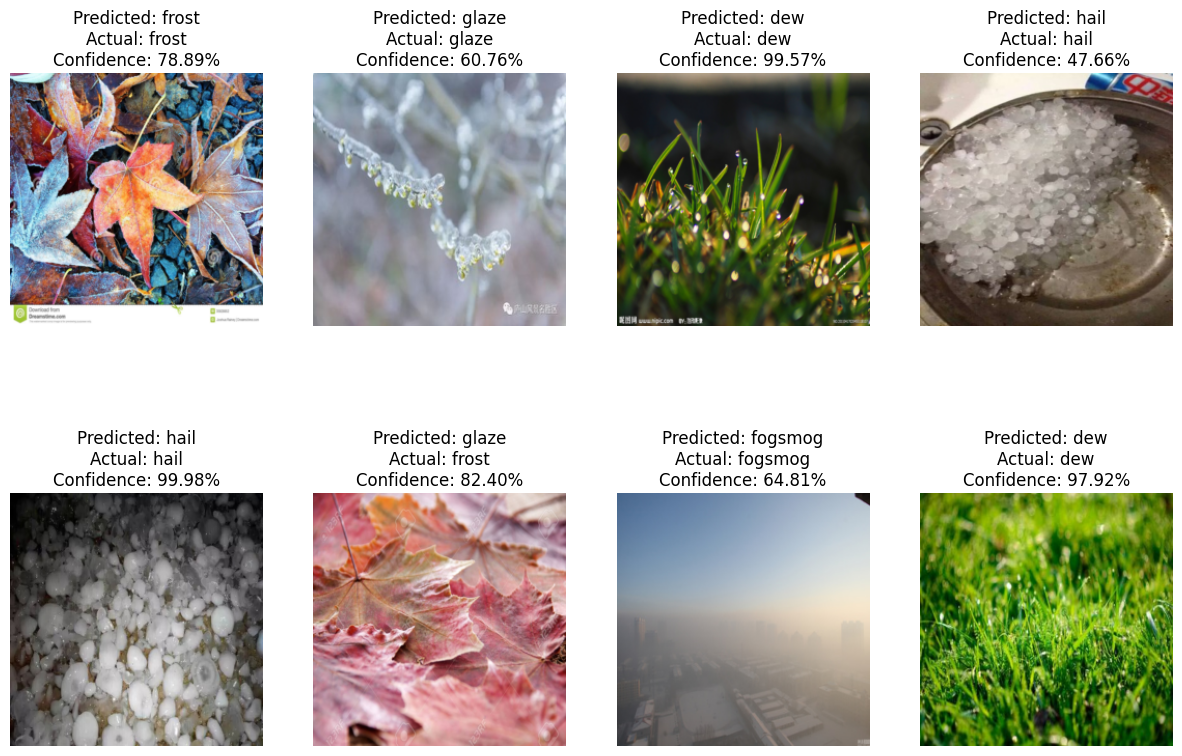

In [15]:
visualize_results(test, model)